
***1. Data Loading and Initial Exploration***

In [1]:
%pip install pandas

In [2]:
import numpy as np
import pandas as pd

Imports numpy (for numerical operations) and pandas (for handling datasets in tabular form).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ds = pd.read_csv('/content/drive/My Drive/ML/Titanic-Dataset.csv')

Reads the Titanic dataset from a CSV file into a Pandas DataFrame named ds.

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Displays information about the dataset, such as column names, data types, and the number of non-null values in each column.

In [9]:
ds.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Counts the number of missing (null) values in each column of the dataset.

In [10]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This function displays the first five rows of the dataset by default.

It helps in quickly inspecting the dataset structure and verifying that the data is loaded correctly.

📌 Use case:

Check if missing values (NaN) exist.

Verify column names and data types.

Understand the general structure of the dataset.

In [11]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Provides statistical summaries of numerical columns in the dataset.

📌 Key Statistics Explained:

Count: Number of non-null values.

Mean: Average value.

Std (Standard Deviation): Measure of data spread.

Min/Max: Minimum and maximum values.

25%, 50%, 75% (Quartiles): Divide the data into four equal parts.


📌 Use case:

Detect outliers (e.g., extremely high fares).

Find missing values (if count is lower than expected).

Understand the distribution of values.

***2. Handling Missing Values***

In [12]:
ds['Embarked'] = ds['Embarked'].fillna(ds['Embarked'].mode()[0])    # Filling the missing values in Embarked column with the mode value

Here, filling missing 'embarked' values is done.

Since "Embarked" has only 2 missing values, we fill them with the mode (most common value).

In [13]:
ds.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Counts the number of missing (null) values in each column of the dataset.

In [14]:
# drop the columns 'Cabin' because it has (more than 50%) missing values
ds = ds.drop(columns=['Cabin'])

Drops the "Cabin" column because it has too many missing values.

Too many missing values (687 out of 891), so it's useless for analysis.



In [15]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Here, viewung sample data is done.

This displays the first 5 rows of the dataset to inspect structure and values.

*   "Survived" (0 = No, 1 = Yes) is the target variable.
*   "Pclass" (Passenger Class: 1st, 2nd, 3rd).


*   "SibSp" (Siblings/Spouses aboard).
*   "Parch" (Parents/Children aboard).

*   "Fare" (Ticket fare price).

In [48]:
ds['Age'] = ds['Age'].fillna(ds['Age'].median())    # Filling the missing values in Age column with the median value

Since "Age" is numerical, we use the median (middle value).

Age has 177 missing values, and the median is more robust than the mean (avoids skewness).



In [17]:
ds.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


***3. Feature Engineering***

In [20]:
ds['FamilySize'] = (ds['SibSp'] + ds['Parch'] + 1).astype(int)   # Adding a new column 'FamilySize' by adding the columns 'SibSp' and 'Parch' and 1

Understanding the Columns Involved
SibSp (Siblings/Spouses Aboard)
This column tells us how many siblings (brothers, sisters) or spouses (husband, wife) a passenger had on the Titanic.

Parch (Parents/Children Aboard)
This column tells us how many parents or children a passenger had on board.

+1 (Including the Passenger Themselves)
Since we are calculating family size, we need to count the passenger too.
So we add 1 to include them in their own family size.

This converts the result to an integer using .astype(int). (Ensures the data type remains an integer, just in case it gets converted to float.)


Why This is Useful:

✅ Helps identify whether a passenger was alone or with family.

✅ Can be used to predict survival rates (People with family had better chances).

In [21]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [22]:
ds['IsAlone'] = (ds['FamilySize']==1).astype(int)  # Adding a new column 'IsAlone' by checking if the 'FamilySize' is 1 and converting it to integer

 ***4. Encoding Categorical Data***

✅ If FamilySize == 1, mark IsAlone = 1 (Alone passenger).

✅ Otherwise, IsAlone = 0 (Had family onboard).


🔹 Why?

People traveling alone had lower survival rates.



In [23]:
%pip install scikit-learn

In [24]:
from sklearn.preprocessing import LabelEncoder

This imports LabelEncoder, a tool from scikit-learn that converts categorical values into numbers.


In [25]:
ds['Sex'] = LabelEncoder().fit_transform(ds['Sex'])    # Encoding

The "Sex" column contains textual (categorical) data ("male", "female").

🔹 Machine learning models cannot work with text values directly; they need numerical inputs.

✅ We convert "Sex" into numbers so that the model can process it.


Alternative: Using map() Instead of LabelEncoder

We can manually assign numerical values:


ds['Sex'] = ds['Sex'].map({'male': 1, 'female': 0})

🔹 This does the same thing but allows more control.



In [26]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,1,1


In [27]:
ds = pd.get_dummies(ds, columns=['Embarked'])    # One Hot Encoding

The "Embarked" column contains categorical (textual) data representing the port where passengers boarded the Titanic:

"C" = Cherbourg

"Q" = Queenstown

"S" = Southampton

🔹 Machine learning models cannot work with categorical text values directly.

✅ Solution: Convert "Embarked" into a numerical format without losing information.



*Why Not Use Label Encoding?*

Label Encoding assigns numbers in an arbitrary order.

🚨 Problem: Models might incorrectly assume numeric relationships between C, Q, and S, which don't actually exist.

✅ Solution: One-Hot Encoding → Creates separate columns for each category.



In [28]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,0,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1,1,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,1,False,False,True


In [29]:
ds = ds.drop(columns=['Name', 'SibSp', 'Parch', 'Ticket'])    # Dropping the columns 'Name', 'SibSp', 'Parch', 'Ticket'

Dropping Irrelevant Columns is done.

🔹 Removes non-useful text-based columns.


In [30]:
ds.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,7.2500,2,0,False,False,True
1,2,1,1,0,38.0,71.2833,2,0,True,False,False
2,3,1,3,0,26.0,7.9250,1,1,False,False,True
3,4,1,1,0,35.0,53.1000,2,0,False,False,True
4,5,0,3,1,35.0,8.0500,1,1,False,False,True


***5. Standardizing Numerical Data***

In [31]:
# standardizing the features
from sklearn.preprocessing import StandardScaler

This imports the StandardScaler class from the sklearn.preprocessing module. The StandardScaler is used to standardize features by removing the mean and scaling to unit variance.

In [32]:
Scalar = StandardScaler()

ds[['Age','Fare']] = Scalar.fit_transform(ds[['Age','Fare']])

Scalar = StandardScaler():

This creates an instance of the StandardScaler class and assigns it to the variable Scalar. Now, Scalar can be used to fit the scaling transformation to your data.

ds[['Age', 'Fare']] = Scalar.fit_transform(ds[['Age', 'Fare']]):

This line standardizes the "Age" and "Fare" columns in the ds DataFrame.

ds[['Age', 'Fare']]: This selects the "Age" and "Fare" columns from the DataFrame ds.

Scalar.fit_transform():
fit() computes the mean and standard deviation for each column (in this case, "Age" and "Fare").

transform() then applies the scaling by subtracting the mean and dividing by the standard deviation.

The result of fit_transform() is a standardized version of the "Age" and "Fare" columns, which is then assigned back to those columns in the ds DataFrame.



**Why Standardize Data?**

Standardizing data ensures that the numerical features have a mean of 0 and a standard deviation of 1. This is important for machine learning models, particularly for algorithms like logistic regression, support vector machines, and k-nearest neighbors, where the scale of features can impact the performance of the model.






In [33]:
ds.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,-0.565736,-0.502445,2,0,False,False,True
1,2,1,1,0,0.663861,0.786845,2,0,True,False,False
2,3,1,3,0,-0.258337,-0.488854,1,1,False,False,True
3,4,1,1,0,0.433312,0.420730,2,0,False,False,True
4,5,0,3,1,0.433312,-0.486337,1,1,False,False,True


In [34]:
ds['Embarked_C'] = LabelEncoder().fit_transform(ds['Embarked_C'])
ds['Embarked_Q'] = LabelEncoder().fit_transform(ds['Embarked_Q'])
ds['Embarked_S'] = LabelEncoder().fit_transform(ds['Embarked_S'])

 LabelEncoder() is being used to transform categorical data into numerical values.

 ds['Embarked_C'] = LabelEncoder().fit_transform(ds['Embarked_C']):

ds['Embarked_C'] refers to a column in the dataset ds that likely contains categorical data, such as labels indicating the embarkation points (like "C" for Cherbourg).

LabelEncoder().fit_transform() is applied to this column. The fit_transform() method performs two steps:

1. fit(): This step analyzes the unique values in the 'Embarked_C' column and assigns each unique value a corresponding integer label.

2. transform(): This step converts each value in 'Embarked_C' to its corresponding integer label (e.g., "C" could become 0, "Q" could become 1, etc., depending on the order of the unique values).


ds['Embarked_Q'] = LabelEncoder().fit_transform(ds['Embarked_Q']) and ds['Embarked_S'] = LabelEncoder().fit_transform(ds['Embarked_S']):

The same process is applied to the 'Embarked_Q' and 'Embarked_S' columns. Each categorical value in these columns is converted into a corresponding numeric label.



 *This process is common when preparing data for machine learning algorithms, as many algorithms require numeric input. Label encoding ensures that categorical variables are converted into numbers without creating any ordinal relationship between the labels (as would happen with one-hot encoding).*


In [35]:
ds.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,-0.565736,-0.502445,2,0,0,0,1
1,2,1,1,0,0.663861,0.786845,2,0,1,0,0
2,3,1,3,0,-0.258337,-0.488854,1,1,0,0,1
3,4,1,1,0,0.433312,0.420730,2,0,0,0,1
4,5,0,3,1,0.433312,-0.486337,1,1,0,0,1


In [36]:
X = ds[['PassengerId','Pclass',	'Sex'	,'Age',	'Fare',	'FamilySize'	,'IsAlone'	,'Embarked_C',	'Embarked_Q',	'Embarked_S']]  # Example features
y = ds['Survived']  # Target variable

Here we are defining the features (X) and the target variable (y) for the machine learning model.


*   X contains the features (independent variables) for each passenger. (X is the feature set used for training)

*   y contains the target variable (dependent variable), which is the survival status of the passengers.
(y is the target variable (the output the model is trying to predict))


*These are the inputs and outputs that will be used when training a machine learning model (e.g., a classification model like logistic regression, decision trees, etc.) to predict whether a passenger survived or not based on the provided features.*

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This is used for splitting the dataset into training and testing sets.

1. train_test_split:

This is a function from sklearn.model_selection that splits a dataset into two subsets: one for training and one for testing.
It randomly splits the data into these subsets while keeping a specified proportion of data for testing.


2. Parameters:

X: This represents the features (independent variables). In this case, it contains all the columns (like Pclass, Sex, Age, etc.) except for the target variable (Survived).

y: This represents the target variable (dependent variable), which is the Survived column, indicating whether the passenger survived or not.

test_size=0.2: This specifies the proportion of the dataset to be used for testing. 0.2 means 20% of the data will be used for testing, and the remaining 80% will be used for training.

random_state=42: This is a seed for the random number generator. Setting it ensures that the data split is reproducible. Every time the code runs, it will produce the same split.

In [38]:
from sklearn.preprocessing import StandardScaler

Scalar = StandardScaler()

X_train = Scalar.fit_transform(X_train)
X_test = Scalar.transform(X_test)

is used to standardize the features (numerical columns) in the dataset, ensuring that they have a mean of 0 and a standard deviation of 1. This is particularly important for many machine learning models, such as logistic regression, k-nearest neighbors, and support vector machines, because the scale of the data can affect model performance.

fit_transform(X_train): Calculates the mean and standard deviation of X_train, then scales the features so that they have a mean of 0 and a standard deviation of 1.

transform(X_test): Scales X_test using the mean and standard deviation calculated from X_train.

 ***Why Standardize?

Equal Scaling: Ensures all features have the same scale, improving model performance.

Faster Training: Standardization can speed up training for models like logistic regression or support vector machines.***

In [39]:
X_train

array([[-0.45306593, -1.61413602,  0.7243102 , ..., -0.46146201,
        -0.30335547,  0.59248936],
       [ 1.11387354, -0.40055118,  0.7243102 , ..., -0.46146201,
        -0.30335547,  0.59248936],
       [-0.25427511,  0.81303367,  0.7243102 , ..., -0.46146201,
        -0.30335547,  0.59248936],
       ...,
       [ 1.60890168,  0.81303367,  0.7243102 , ..., -0.46146201,
        -0.30335547,  0.59248936],
       [-0.04768856, -1.61413602, -1.38062393, ..., -0.46146201,
        -0.30335547,  0.59248936],
       [-1.34567573, -1.61413602,  0.7243102 , ..., -0.46146201,
        -0.30335547,  0.59248936]])

X_train is a variable that holds the training feature set

Why X_train?

Training the Model: During training, the model uses X_train to learn the relationship between the features and the target (e.g., predicting survival based on passenger attributes).

So, X_train is the part of the dataset that the model uses to learn from, and it contains all the feature columns used for prediction, but not the target variable (e.g., 'Survived').

***6. Model Training***

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

This is used to train the ML model using Logistic Regression.

This code initializes a Logistic Regression model and trains it using the feature set (X_train) and the target variable (y_train). The model will learn patterns from the data and adjust its parameters to make accurate predictions on new, unseen data.

from sklearn.linear_model import LogisticRegression:

This imports the LogisticRegression class from sklearn.linear_model. Logistic Regression is a statistical method used for binary classification (predicting one of two possible outcomes, like whether a passenger survived or not).

model = LogisticRegression():

This creates an instance of the LogisticRegression class and assigns it to the variable model.
model now holds the Logistic Regression algorithm that will be used to train the data.

model.fit(X_train, y_train):

fit(): This method trains the model using the training data (X_train and y_train).


The model learns the relationship between the features in X_train and the corresponding labels in y_train. During this process, it adjusts its internal parameters (weights) to minimize the error in predicting y_train based on X_train.

In [41]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

This is used to make predictions using the trained Logistic Regression model.

1. model.predict(X_test):

This method uses the trained model to predict the target variable (e.g., whether a passenger survived or not) based on the feature set X_test.

X_test is the test dataset that was not seen by the model during training, which allows you to evaluate how well the model performs on new, unseen data.

The model uses the patterns it learned during training to make predictions about the survival status (1 = survived, 0 = did not survive) for each passenger in the X_test dataset.

2. y_pred:

y_pred stores the predicted values (the output of the predict() method). These are the model’s guesses for the target variable (e.g., survival status) based on the features in X_test.


***6. Model Evaluation***

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

This imports several evaluation metrics from the sklearn.metrics module. These metrics are used to evaluate the performance of a classification model (like Logistic Regression) on the test data.


In [43]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)


1. accuracy_score:

This metric calculates the accuracy of the model, which is the proportion of correct predictions (both True Positives and True Negatives) out of all predictions.

It’s useful when the classes are balanced but may be misleading if the data is imbalanced (e.g., if one class is much larger than the other).

2. precision_score:

This metric calculates precision, which is the proportion of positive predictions that are actually correct.

Precision is useful when the cost of False Positives is high (e.g., predicting a passenger survived when they actually didn’t).


3. recall_score:

This metric calculates recall, which is the proportion of actual positive cases that were correctly predicted.

Recall is useful when the cost of False Negatives is high (e.g., predicting a passenger did not survive when they actually did).

4. f1_score:

The F1 score is the harmonic mean of precision and recall. It combines both precision and recall into a single metric by balancing them.

This is useful when you want a balance between precision and recall, especially when there is a class imbalance.

5. confusion_matrix:

This function computes the confusion matrix, which is a table that shows the number of True Positives, False Positives, True Negatives, and False Negatives.

The confusion matrix provides insight into how well the model is performing, especially in cases of class imbalance.

***These functions are used to evaluate how well the classification model performed. Each metric focuses on different aspects of model performance (e.g., overall accuracy, balance between precision and recall, etc.). The confusion matrix provides a more detailed breakdown of correct and incorrect predictions.***

In [44]:
%pip install seaborn
%pip install matplotlib

%pip install seaborn → Installs Seaborn, a statistical data visualization library built on top of Matplotlib.

%pip install matplotlib → Installs Matplotlib, a widely used library for creating static, animated, and interactive visualizations.

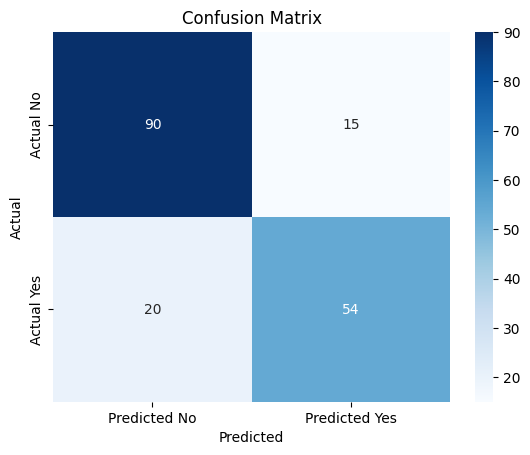

In [45]:
#draw the matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion, annot=True, cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This visualizes the confusion matrix using Seaborn and Matplotlib to evaluate the performance of a classification model.

import seaborn as sns, import matplotlib.pyplot as plt
→ Imports Seaborn for visualization and Matplotlib for plotting.

sns.heatmap(confusion, annot=True, cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
→ Creates a heatmap of the confusion matrix:

confusion → The confusion matrix (computed earlier).
annot=True → Displays actual numbers inside the heatmap cells.
cmap='Blues' → Uses a blue color gradient.
xticklabels & yticklabels → Label axes for clarity.
Labels and Title:

plt.xlabel('Predicted') → X-axis as Predicted labels.
plt.ylabel('Actual') → Y-axis as Actual labels.
plt.title('Confusion Matrix') → Sets plot title.
plt.show()
→ Displays the heatmap.

Purpose:

✅ Helps analyze model performance by showing correct vs incorrect predictions.

✅ Easier to interpret classification errors visually.



In [46]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:', confusion)

Accuracy: 0.8044692737430168
Precision: 0.782608695652174
Recall: 0.7297297297297297
F1 Score: 0.7552447552447552
Confusion Matrix: [[90 15]
 [20 54]]


This prints key evaluation metrics for a classification model.

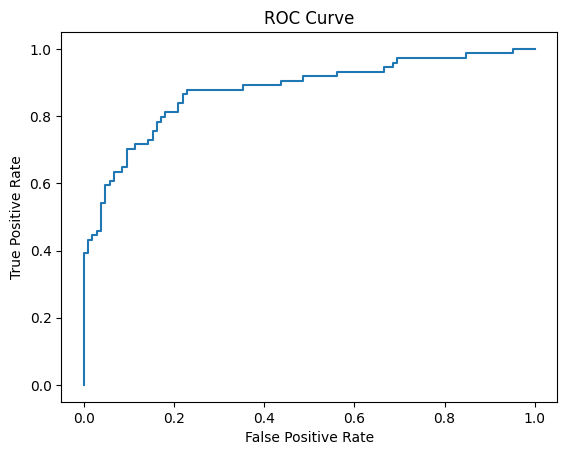

In [47]:
#Draw the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

This code plots the Receiver Operating Characteristic (ROC) curve, which helps evaluate a classification model’s performance.

Breakdown:
y_pred_proba = model.predict_proba(X_test)[:,1]
→ Gets the predicted probabilities for the positive class (1).

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
→ Computes the False Positive Rate (FPR) and True Positive Rate (TPR) at different thresholds.

plt.plot(fpr, tpr)
→ Plots the ROC curve (TPR vs. FPR).

plt.xlabel('False Positive Rate')
→ Labels the x-axis as False Positive Rate (FPR).

plt.ylabel('True Positive Rate')
→ Labels the y-axis as True Positive Rate (TPR).


Purpose:

✅ Helps analyze how well the model distinguishes between classes.

✅ A perfect classifier would have a curve closer to the top left (higher TPR, lower FPR).

✅ Often used alongside the AUC (Area Under the Curve) score to summarize performance.